# Датасет Саши (с использованием классов)

In [1]:
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [3]:
def save_obj(obj, name):
    os.makedirs("obj/PTB_XL/With Classes Test", exist_ok=True)
    with open('obj/PTB_XL/With Classes Test/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/PTB_XL/With Classes Test/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
dataset = pd.read_csv('../datasets/PTB_XL.csv', sep=',')
dataset

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0     NaN    63.0   88.854167    10.836725   
1           2    0  19.0     NaN    70.0   87.304365    12.881166   
2           3    1  37.0     NaN    69.0   82.310648    13.188344   
3           4    0  24.0     NaN    82.0   88.672703    12.592751   
4           5    1  19.0     NaN    70.0   92.718519    10.080940   
...       ...  ...   ...     ...     ...         ...          ...   
21832   21833    1  67.0     NaN     NaN   83.363930    14.132517   
21833   21834    0  93.0     NaN     NaN  100.100000     7.918754   
21834   21835    1  59.0     NaN     NaN   89.650000    10.266897   
21835   21836    1  64.0     NaN     NaN   98.320106    10.089180   
21836   21837    0  68.0     NaN     NaN   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ...  NORM  MI  STTC  CD  HYP  \
0         83.796296       2.678984  163.201852  ...     1   0     0   0    0   
1         84.380952       2.950844  209.904762  ...     1   0     0   0    0   
2         81.148148       4.022570  183.480808  ...     1   0     0   0    0   
3         97.016667       2.889637  179.616667  ...     1   0     0   0    0   
4         86.388889       2.561185  183.248148  ...     1   0     0   0    0   
...             ...            ...         ...  ...   ...  ..   ...  ..  ...   
21832     92.419048      11.880983  108.567796  ...     0   0     1   0    0   
21833     88.633333       2.576820  196.740741  ...     1   0     0   0    0   
21834     90.791667       3.243583  157.833333  ...     0   0     1   0    0   
21835     86.100000       3.770942  177.083333  ...     1   0     0   0    0   
21836     81.333333       2.371708  199.509259  ...     1   0     0   0    0   

       NORM_PROB  MI_PROB  STTC_PROB  CD_PROB  HYP_PROB  
0            100        0          0        0         0  
1             80        0          0        0         0  
2            100        0          0        0         0  
3            100        0          0        0         0  
4            100        0          0        0         0  
...          ...      ...        ...      ...       ...  
21832          0        0        100        0         0  
21833        100        0          0        0         0  
21834          0        0         50        0         0  
21835        100        0          0        0         0  
21836        100        0          0        0         0  

[21837 rows x 197 columns]

In [6]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

ecg_id: 0 NaN vals
SEX: 0 NaN vals
AGE: 89 NaN vals
HEIGHT: 14854 NaN vals
WEIGHT: 12408 NaN vals
ALL_C_P_AV: 0 NaN vals
ALL_C_P_DEV: 0 NaN vals
ALL_C_QRS_AV: 0 NaN vals
ALL_C_QRS_DEV: 0 NaN vals
ALL_C_T_AV: 0 NaN vals
ALL_C_T_DEV: 0 NaN vals
ALL_C_PR_INT_AV: 0 NaN vals
ALL_C_PR_INT_DEV: 0 NaN vals
ALL_C_PR_SEGM_AV: 0 NaN vals
ALL_C_PR_SEGM_DEV: 0 NaN vals
ALL_C_ST_SEGM_AV: 0 NaN vals
ALL_C_ST_SEGM_DEV: 0 NaN vals
ALL_C_QT_INT_AV: 0 NaN vals
ALL_C_QT_INT_DEV: 0 NaN vals
I_C_P_AV: 0 NaN vals
I_C_P_DEV: 0 NaN vals
I_C_QRS_AV: 0 NaN vals
I_C_QRS_DEV: 0 NaN vals
I_C_T_AV: 0 NaN vals
I_C_T_DEV: 0 NaN vals
I_C_PR_INT_AV: 0 NaN vals
I_C_PR_INT_DEV: 0 NaN vals
I_C_PR_SEGM_AV: 0 NaN vals
I_C_PR_SEGM_DEV: 0 NaN vals
I_C_ST_SEGM_AV: 0 NaN vals
I_C_ST_SEGM_DEV: 0 NaN vals
I_C_QT_INT_AV: 0 NaN vals
I_C_QT_INT_DEV: 0 NaN vals
II_C_P_AV: 0 NaN vals
II_C_P_DEV: 0 NaN vals
II_C_QRS_AV: 0 NaN vals
II_C_QRS_DEV: 0 NaN vals
II_C_T_AV: 0 NaN vals
II_C_T_DEV: 0 NaN vals
II_C_PR_INT_AV: 0 NaN vals
II_C_PR_IN

In [7]:
quantify_nans(dataset)

Missing values 27351 (0.6390342921067313%)
Number of complete rows: 6680 (30.590282547969043%)


In [8]:
dataset['HEIGHT']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21832   NaN
21833   NaN
21834   NaN
21835   NaN
21836   NaN
Name: HEIGHT, Length: 21837, dtype: float64

In [9]:
dataset.at[0,'ecg_id']

1

In [10]:
list_to_drop = []
for i in range(len(dataset)):
    if (dataset.at[i, 'NORM'] + dataset.at[i, 'MI'] + dataset.at[i, 'STTC'] + dataset.at[i, 'CD'] + dataset.at[i, 'HYP'] == 0):
        list_to_drop.append(i)
        
dataset_dropped = dataset.drop(dataset.index[list_to_drop])

In [11]:
len(dataset), len(dataset_dropped)

(21837, 21430)

In [12]:
dataset_dropped

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0     NaN    63.0   88.854167    10.836725   
1           2    0  19.0     NaN    70.0   87.304365    12.881166   
2           3    1  37.0     NaN    69.0   82.310648    13.188344   
3           4    0  24.0     NaN    82.0   88.672703    12.592751   
4           5    1  19.0     NaN    70.0   92.718519    10.080940   
...       ...  ...   ...     ...     ...         ...          ...   
21832   21833    1  67.0     NaN     NaN   83.363930    14.132517   
21833   21834    0  93.0     NaN     NaN  100.100000     7.918754   
21834   21835    1  59.0     NaN     NaN   89.650000    10.266897   
21835   21836    1  64.0     NaN     NaN   98.320106    10.089180   
21836   21837    0  68.0     NaN     NaN   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ...  NORM  MI  STTC  CD  HYP  \
0         83.796296       2.678984  163.201852  ...     1   0     0   0    0   
1         84.380952       2.950844  209.904762  ...     1   0     0   0    0   
2         81.148148       4.022570  183.480808  ...     1   0     0   0    0   
3         97.016667       2.889637  179.616667  ...     1   0     0   0    0   
4         86.388889       2.561185  183.248148  ...     1   0     0   0    0   
...             ...            ...         ...  ...   ...  ..   ...  ..  ...   
21832     92.419048      11.880983  108.567796  ...     0   0     1   0    0   
21833     88.633333       2.576820  196.740741  ...     1   0     0   0    0   
21834     90.791667       3.243583  157.833333  ...     0   0     1   0    0   
21835     86.100000       3.770942  177.083333  ...     1   0     0   0    0   
21836     81.333333       2.371708  199.509259  ...     1   0     0   0    0   

       NORM_PROB  MI_PROB  STTC_PROB  CD_PROB  HYP_PROB  
0            100        0          0        0         0  
1             80        0          0        0         0  
2            100        0          0        0         0  
3            100        0          0        0         0  
4            100        0          0        0         0  
...          ...      ...        ...      ...       ...  
21832          0        0        100        0         0  
21833        100        0          0        0         0  
21834          0        0         50        0         0  
21835        100        0          0        0         0  
21836        100        0          0        0         0  

[21430 rows x 197 columns]

In [13]:
dataset_dropped.reset_index(drop=True, inplace=True)

In [14]:
dataset_dropped

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0     NaN    63.0   88.854167    10.836725   
1           2    0  19.0     NaN    70.0   87.304365    12.881166   
2           3    1  37.0     NaN    69.0   82.310648    13.188344   
3           4    0  24.0     NaN    82.0   88.672703    12.592751   
4           5    1  19.0     NaN    70.0   92.718519    10.080940   
...       ...  ...   ...     ...     ...         ...          ...   
21425   21833    1  67.0     NaN     NaN   83.363930    14.132517   
21426   21834    0  93.0     NaN     NaN  100.100000     7.918754   
21427   21835    1  59.0     NaN     NaN   89.650000    10.266897   
21428   21836    1  64.0     NaN     NaN   98.320106    10.089180   
21429   21837    0  68.0     NaN     NaN   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ...  NORM  MI  STTC  CD  HYP  \
0         83.796296       2.678984  163.201852  ...     1   0     0   0    0   
1         84.380952       2.950844  209.904762  ...     1   0     0   0    0   
2         81.148148       4.022570  183.480808  ...     1   0     0   0    0   
3         97.016667       2.889637  179.616667  ...     1   0     0   0    0   
4         86.388889       2.561185  183.248148  ...     1   0     0   0    0   
...             ...            ...         ...  ...   ...  ..   ...  ..  ...   
21425     92.419048      11.880983  108.567796  ...     0   0     1   0    0   
21426     88.633333       2.576820  196.740741  ...     1   0     0   0    0   
21427     90.791667       3.243583  157.833333  ...     0   0     1   0    0   
21428     86.100000       3.770942  177.083333  ...     1   0     0   0    0   
21429     81.333333       2.371708  199.509259  ...     1   0     0   0    0   

       NORM_PROB  MI_PROB  STTC_PROB  CD_PROB  HYP_PROB  
0            100        0          0        0         0  
1             80        0          0        0         0  
2            100        0          0        0         0  
3            100        0          0        0         0  
4            100        0          0        0         0  
...          ...      ...        ...      ...       ...  
21425          0        0        100        0         0  
21426        100        0          0        0         0  
21427          0        0         50        0         0  
21428        100        0          0        0         0  
21429        100        0          0        0         0  

[21430 rows x 197 columns]

In [20]:
count = 0
for i in range(len(dataset_dropped)):
    if (dataset_dropped.at[i, 'NORM'] == 1 & 
        dataset_dropped.at[i, 'MI'] + 
        dataset_dropped.at[i, 'STTC'] + 
        dataset_dropped.at[i, 'CD'] + 
        dataset_dropped.at[i, 'HYP'] >= 1):
        print(f"ix = {i}: NORM_PROB = {dataset_dropped.at[i, 'NORM_PROB']}, MI_PROB = {dataset_dropped.at[i,'MI_PROB']}, STTC_PROB = {dataset_dropped.at[i, 'STTC_PROB']}, CD_PROB = {dataset_dropped.at[i, 'CD_PROB']}, HYP_PROB = {dataset_dropped.at[i, 'HYP_PROB']}")
        count += 1
count 

ix = 209: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 226: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 227: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 282: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 353: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 409: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 466: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 573: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 635: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 696: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 713: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 749: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 0, HYP_PROB = 0
ix = 757: NOR

ix = 9186: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9226: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9243: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9487: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9500: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9540: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9683: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9776: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9801: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9803: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9887: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 9917: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0


ix = 19116: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 19131: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 19618: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 19638: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 19760: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 19796: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 19845: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 20116: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 20343: NORM_PROB = 80, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 20402: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 20431: NORM_PROB = 50, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100, HYP_PROB = 0
ix = 20649: NORM_PROB = 100, MI_PROB = 0, STTC_PROB = 0, CD_PROB = 100

438

In [16]:
X_data_raw = dataset_dropped.drop('ecg_id', axis=1)

## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

X_data_prep = num_pipeline.fit_transform(X_data_raw) 
X_data_prep_std = num_pipeline_std.fit_transform(X_data_raw) 
X_prep = pd.DataFrame(X_data_prep)
X_prep_std = pd.DataFrame(X_data_prep_std)

### Оптимизация

In [18]:
'''
variable_types, binary, continuous, ordinal = detect_variable_type(dataset_dropped, 10, verbose=False)
dfq,replacement_info = quantify_dataframe_univariate(dataset_dropped, variable_types)
with open('temp.txt','w') as fid:
    fid.write(replacement_info)
'''

"\nvariable_types, binary, continuous, ordinal = detect_variable_type(dataset_dropped, 10, verbose=False)\ndfq,replacement_info = quantify_dataframe_univariate(dataset_dropped, variable_types)\nwith open('temp.txt','w') as fid:\n    fid.write(replacement_info)\n"

In [19]:
'''
dfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)
dequant_info = invert_quant_info(load_quantification_info('temp.txt'))
df_imputed = dequantify_table(dfq_imputed,dequant_info)
display(df_imputed)
'''

"\ndfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)\ndequant_info = invert_quant_info(load_quantification_info('temp.txt'))\ndf_imputed = dequantify_table(dfq_imputed,dequant_info)\ndisplay(df_imputed)\n"

In [20]:
'''
df = remove_constant_columns_from_dataframe(df_imputed)
variable_names = [str(s) for s in df.columns[1:]]
X = df[df.columns[1:]].to_numpy()
X_orig_opt = X
X_before_scaling = X.copy()
X_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)
'''

'\ndf = remove_constant_columns_from_dataframe(df_imputed)\nvariable_names = [str(s) for s in df.columns[1:]]\nX = df[df.columns[1:]].to_numpy()\nX_orig_opt = X\nX_before_scaling = X.copy()\nX_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)\n'

In [21]:
'''
save_obj(df, "dataframe_opt")
save_obj(X_opt, "X_opt")
save_obj(cik, "cik")
save_obj(X_orig_opt, "X_orig_opt")
save_obj(X_before_scaling, "X_before_scaling")
'''

'\nsave_obj(df, "dataframe_opt")\nsave_obj(X_opt, "X_opt")\nsave_obj(cik, "cik")\nsave_obj(X_orig_opt, "X_orig_opt")\nsave_obj(X_before_scaling, "X_before_scaling")\n'

In [22]:
X_opt = load_obj("X_opt")
cik = load_obj("cik")
X_orig_opt = load_obj("X_orig_opt")
X_before_scaling = load_obj("X_before_scaling")
dataframe_opt = load_obj("dataframe_opt")

## 2. Построение деревьев

In [23]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = X_prep.to_numpy()
X_std = X_prep_std.to_numpy()

In [24]:
def do_PCA(X):
    reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:, 0:reduced_dimension], v, mean_val 

X_pca_norm, components_norm, mnval_norm = do_PCA(X_norm)
X_pca_std, components_std, mnval_std = do_PCA(X_std)
X_pca_opt, components_opt, mnval_opt = do_PCA(X_opt)

In [25]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended
'''
PTB_tree_norm = create_extended_tree(X_pca_norm, 50)
PTB_tree_std = create_extended_tree(X_pca_std, 50)
PTB_tree_opt = create_extended_tree(X_pca_opt, 50)
'''

'\nPTB_tree_norm = create_extended_tree(X_pca_norm, 50)\nPTB_tree_std = create_extended_tree(X_pca_std, 50)\nPTB_tree_opt = create_extended_tree(X_pca_opt, 50)\n'

In [26]:
'''
save_obj(PTB_tree_norm, "PTB_tree_norm")
save_obj(PTB_tree_std, "PTB_tree_std")
save_obj(PTB_tree_opt, "PTB_tree_opt")
'''

'\nsave_obj(PTB_tree_norm, "PTB_tree_norm")\nsave_obj(PTB_tree_std, "PTB_tree_std")\nsave_obj(PTB_tree_opt, "PTB_tree_opt")\n'

In [27]:
tree_norm = load_obj("PTB_tree_norm")
tree_std = load_obj("PTB_tree_std")
tree_opt = load_obj("PTB_tree_opt")

In [30]:
X_orig_imputer = SimpleImputer(strategy="median").fit_transform(X_data_raw)
variable_names = [str(s) for s in dataframe_opt.columns[1:]]

## 3. Визуализация деревьев

### Окраска ветвей деревьев

In [31]:
def tree_visualization(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)

In [32]:
figsize=(15, 12)

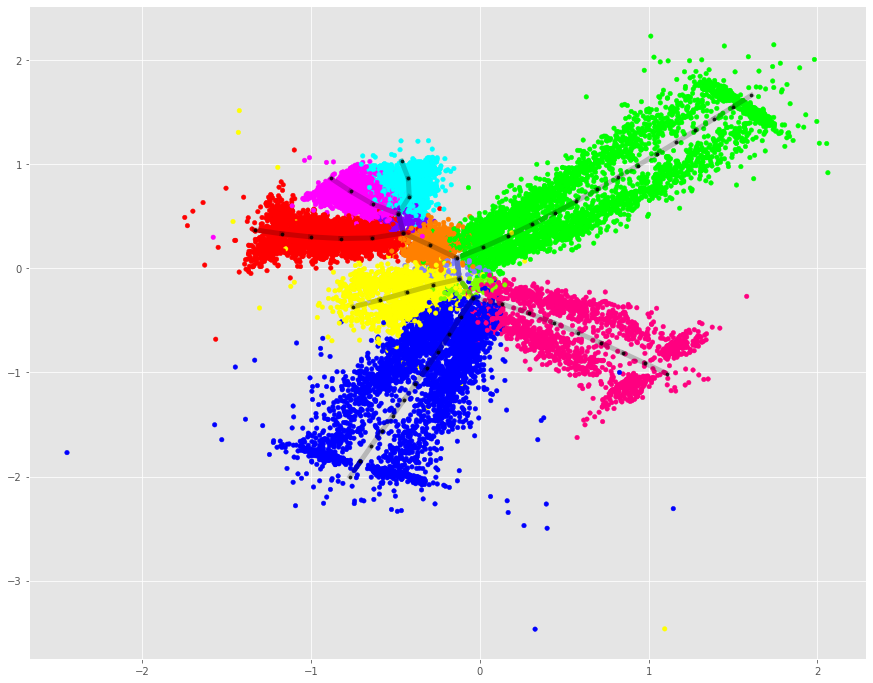

In [33]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm)
plt.show()

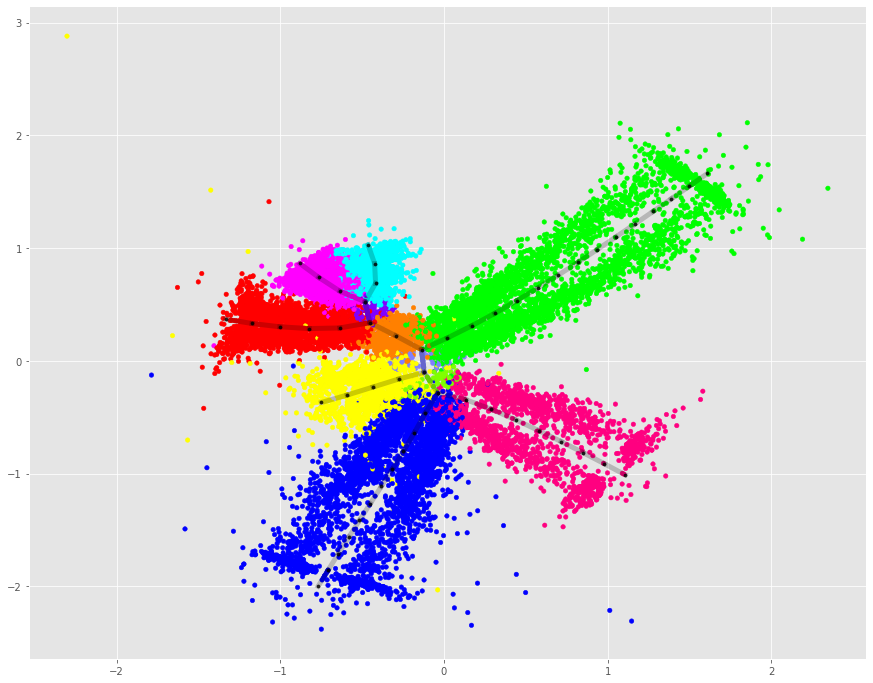

In [34]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std)
plt.show()

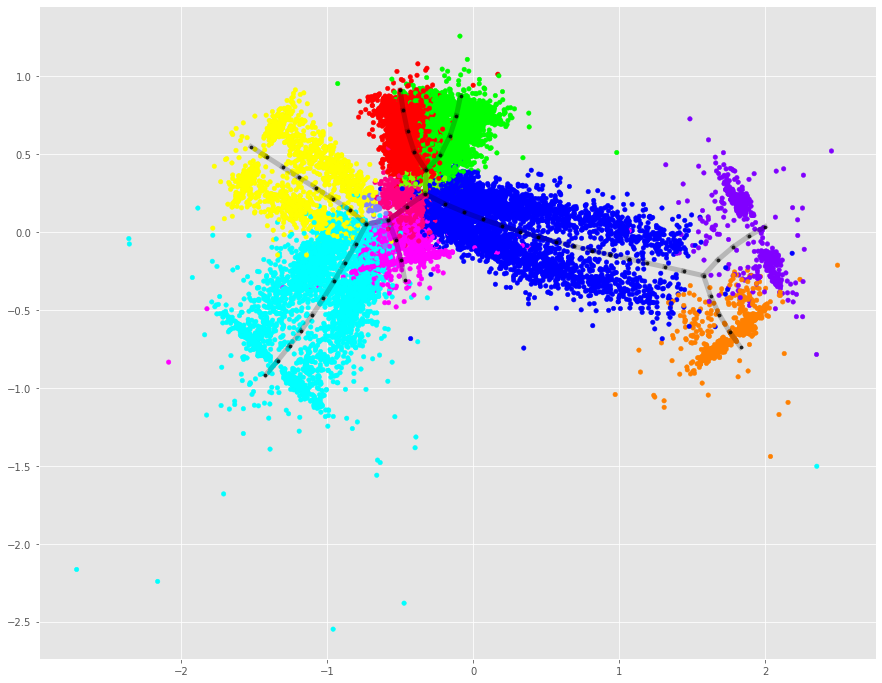

In [35]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt)
plt.show()

### Визуализация атрибутов и исследование деревьев

#### Нормализация

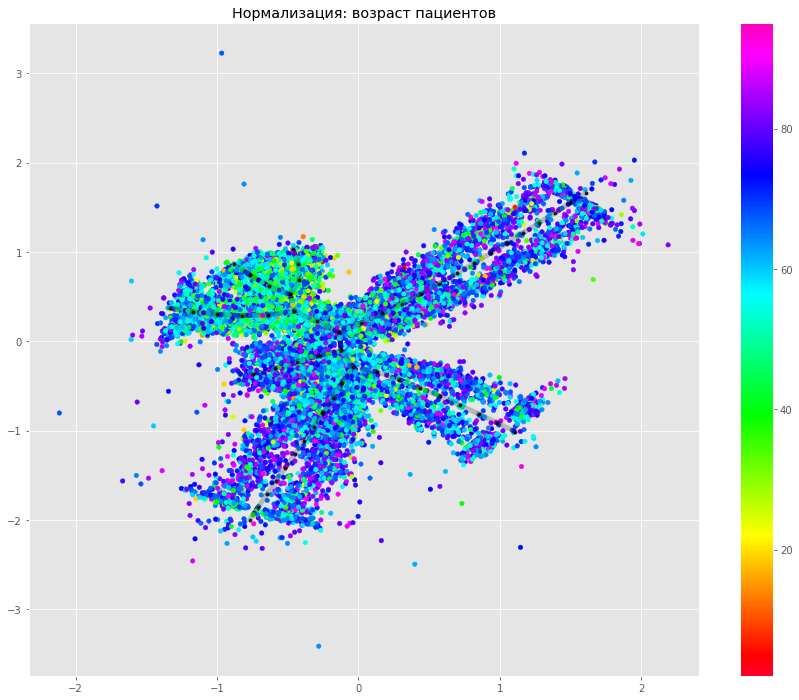

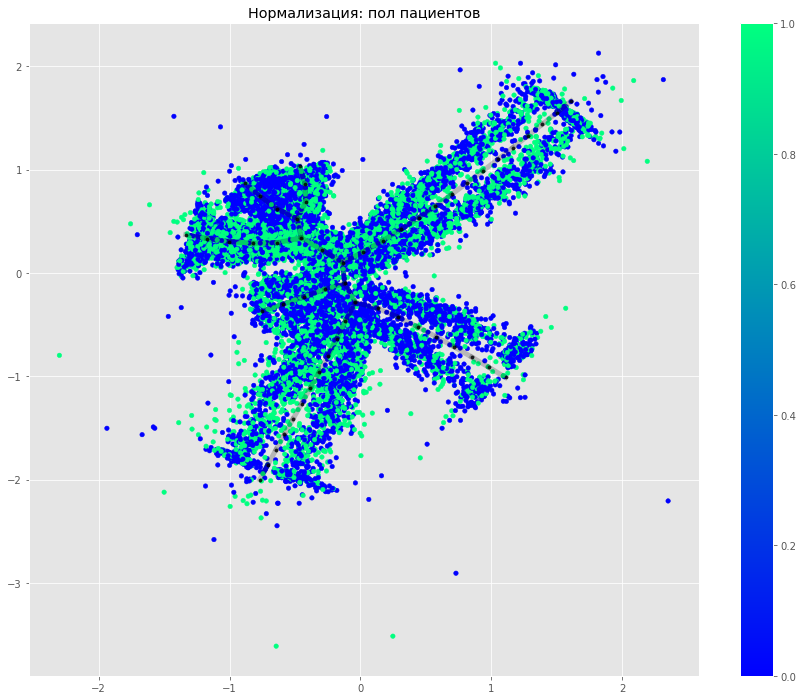

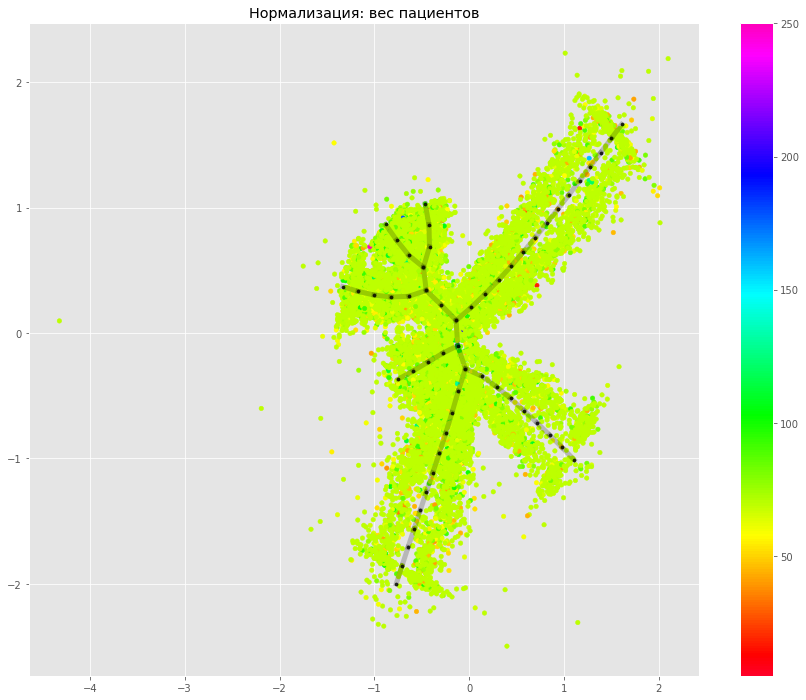

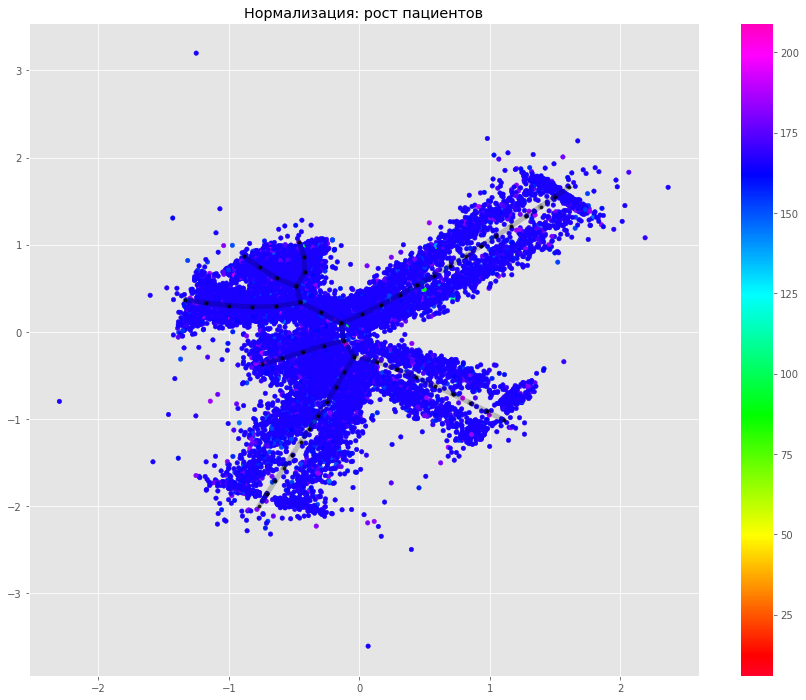

In [36]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='SEX', cmap='winter', add_color_bar=True)
plt.title("Нормализация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: вес пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: рост пациентов")
plt.show()

#### Стандартизация

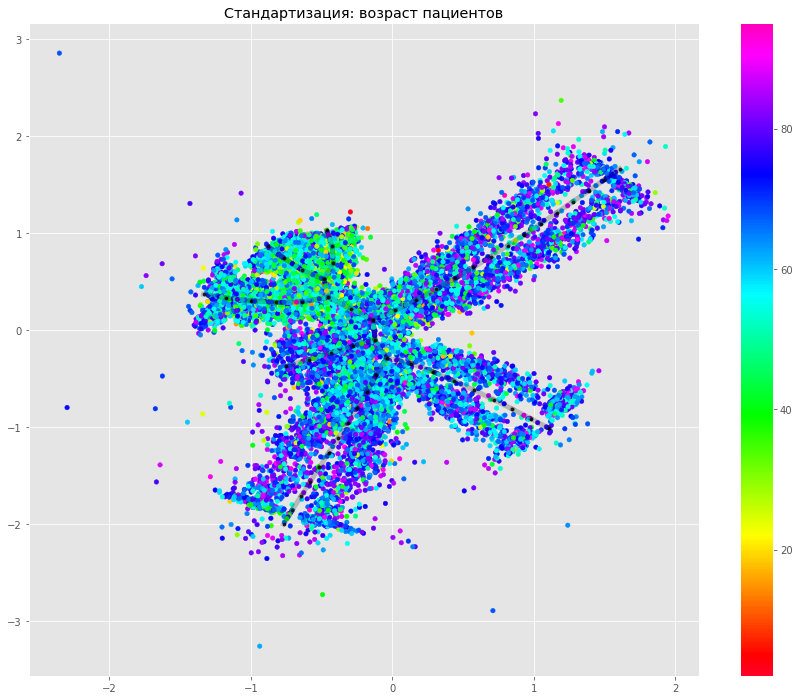

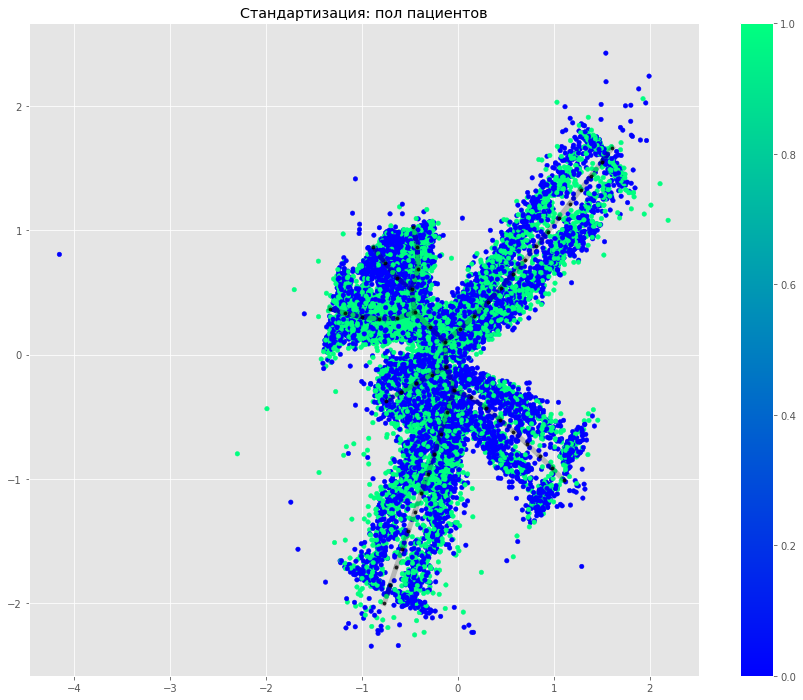

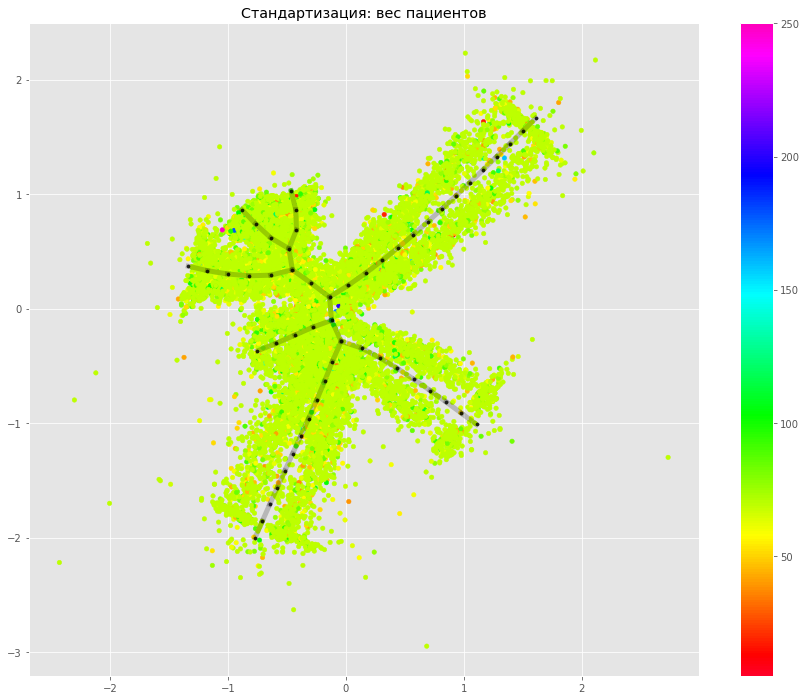

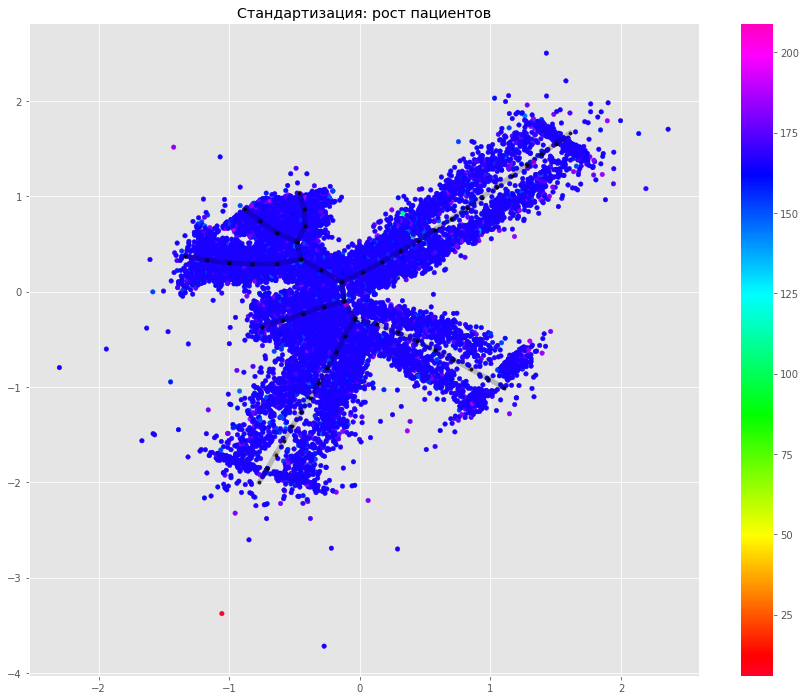

In [37]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='SEX', cmap='winter', add_color_bar=True)
plt.title("Стандартизация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: вес пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: рост пациентов")
plt.show()

#### Оптимизация

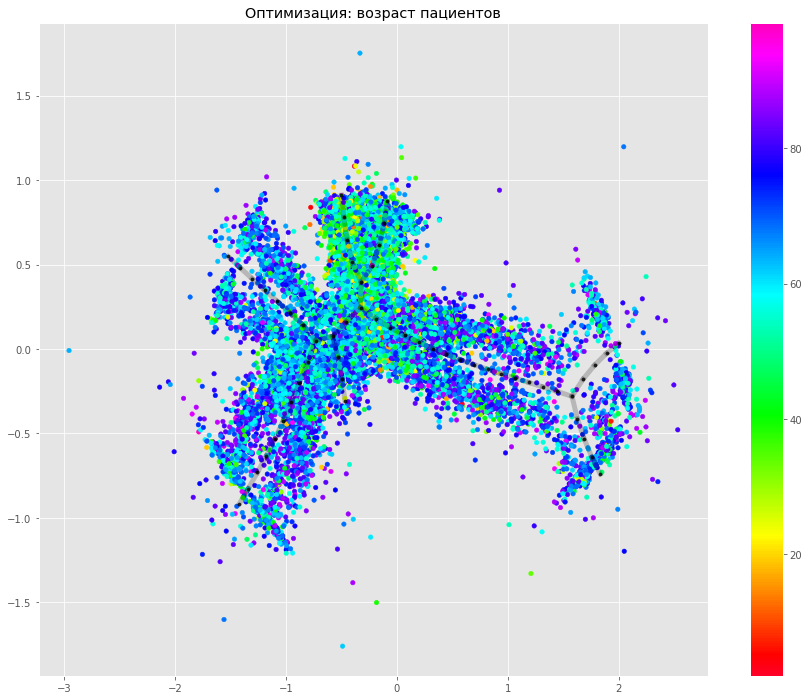

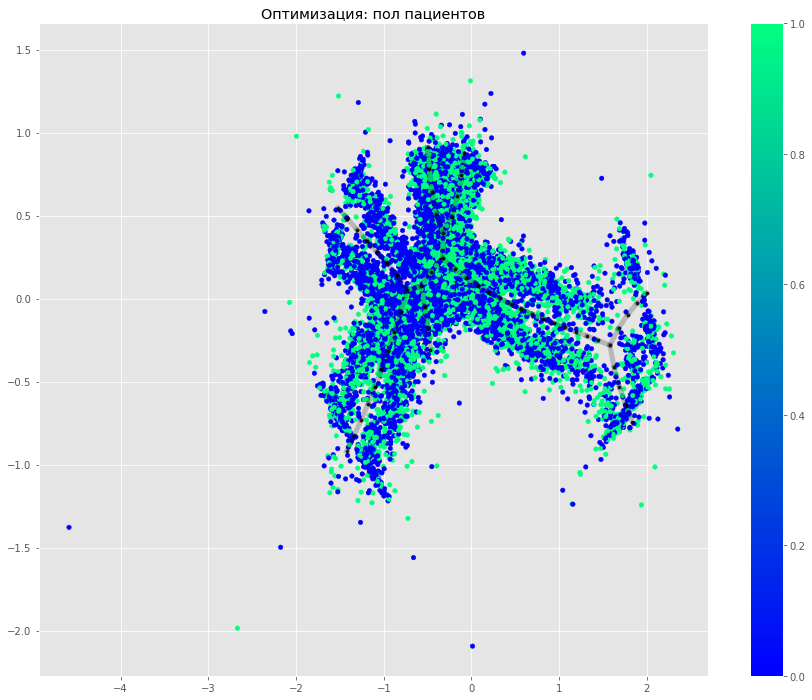

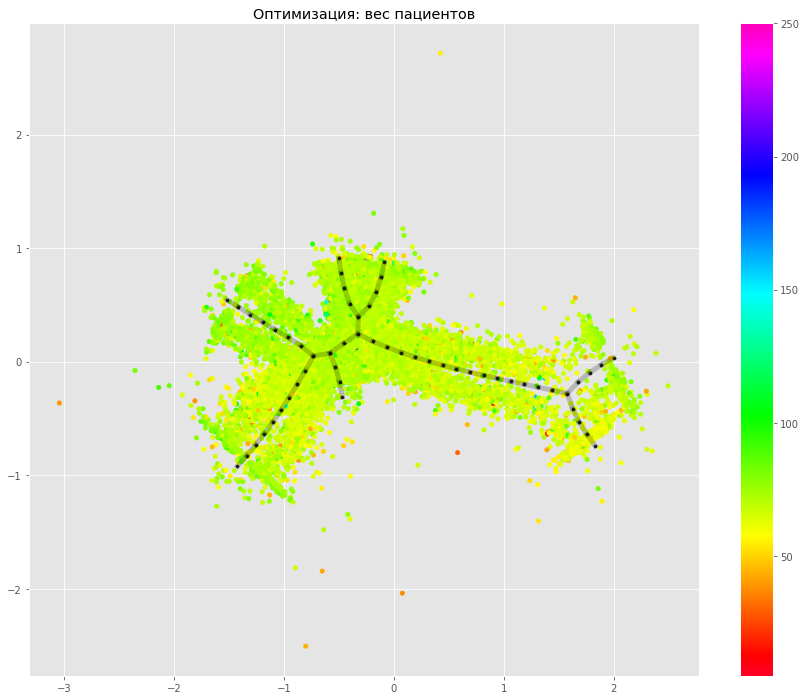

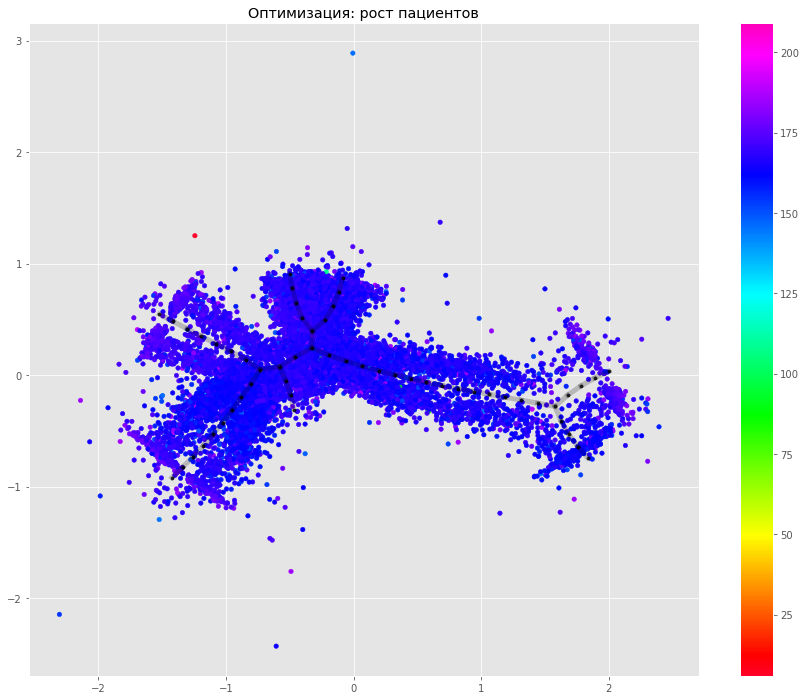

In [38]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='SEX', cmap='winter', add_color_bar=True)
plt.title("Оптимизация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: вес пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: рост пациентов")
plt.show()

In [39]:
classes = []
for i in range(len(dataset_dropped)):
    if ((dataset_dropped.at[i, 'NORM'] + 
        dataset_dropped.at[i, 'MI'] + 
        dataset_dropped.at[i, 'STTC'] + 
        dataset_dropped.at[i, 'CD'] + 
        dataset_dropped.at[i, 'HYP']) > 1):
        classes.append(5)
    else:
        for j, col in zip([0, 1, 2, 3, 4], ['NORM', 'MI', 'STTC', 'CD', 'HYP']):
            if (dataset_dropped.at[i, col]):
                classes.append(j)
dataset_dropped['Class'] = classes

In [40]:
dataset_dropped

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0     NaN    63.0   88.854167    10.836725   
1           2    0  19.0     NaN    70.0   87.304365    12.881166   
2           3    1  37.0     NaN    69.0   82.310648    13.188344   
3           4    0  24.0     NaN    82.0   88.672703    12.592751   
4           5    1  19.0     NaN    70.0   92.718519    10.080940   
...       ...  ...   ...     ...     ...         ...          ...   
21425   21833    1  67.0     NaN     NaN   83.363930    14.132517   
21426   21834    0  93.0     NaN     NaN  100.100000     7.918754   
21427   21835    1  59.0     NaN     NaN   89.650000    10.266897   
21428   21836    1  64.0     NaN     NaN   98.320106    10.089180   
21429   21837    0  68.0     NaN     NaN   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ...  MI  STTC  CD  HYP  \
0         83.796296       2.678984  163.201852  ...   0     0   0    0   
1         84.380952       2.950844  209.904762  ...   0     0   0    0   
2         81.148148       4.022570  183.480808  ...   0     0   0    0   
3         97.016667       2.889637  179.616667  ...   0     0   0    0   
4         86.388889       2.561185  183.248148  ...   0     0   0    0   
...             ...            ...         ...  ...  ..   ...  ..  ...   
21425     92.419048      11.880983  108.567796  ...   0     1   0    0   
21426     88.633333       2.576820  196.740741  ...   0     0   0    0   
21427     90.791667       3.243583  157.833333  ...   0     1   0    0   
21428     86.100000       3.770942  177.083333  ...   0     0   0    0   
21429     81.333333       2.371708  199.509259  ...   0     0   0    0   

       NORM_PROB  MI_PROB  STTC_PROB  CD_PROB  HYP_PROB  Class  
0            100        0          0        0         0      0  
1             80        0          0        0         0      0  
2            100        0          0        0         0      0  
3            100        0          0        0         0      0  
4            100        0          0        0         0      0  
...          ...      ...        ...      ...       ...    ...  
21425          0        0        100        0         0      2  
21426        100        0          0        0         0      0  
21427          0        0         50        0         0      2  
21428        100        0          0        0         0      0  
21429        100        0          0        0         0      0  

[21430 rows x 198 columns]

In [43]:
variable_names_classes = [str(s) for s in dataset_dropped.columns[1:]]
X_classes_orig_imputer = dataset_dropped.drop('ecg_id', axis=1)
X_classes_orig_imputer = SimpleImputer(strategy="median").fit_transform(X_classes_orig_imputer)

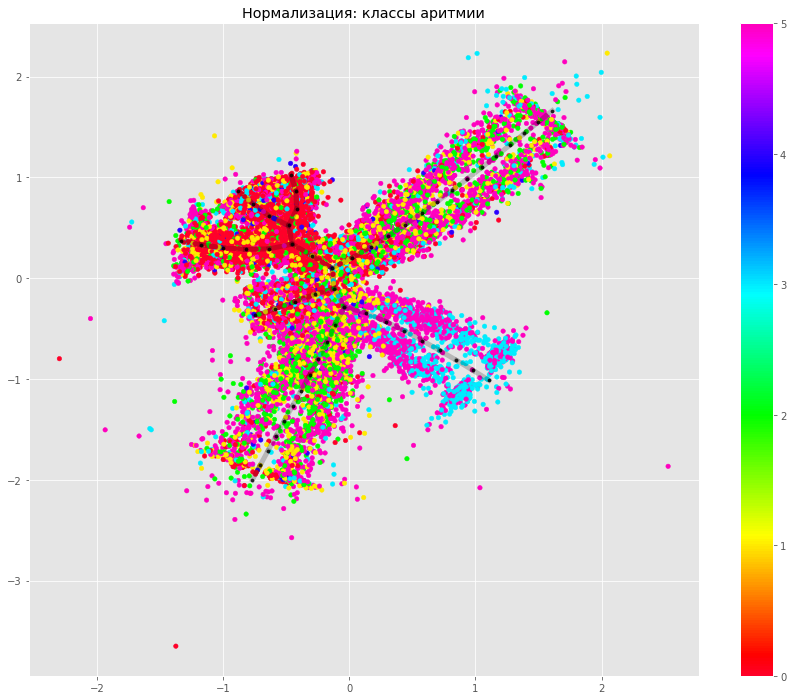

In [44]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_classes_orig_imputer, components_norm, mnval_norm, 'k', variable_names_classes,
                           Color_by_feature='Class', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: классы аритмии")
plt.show()

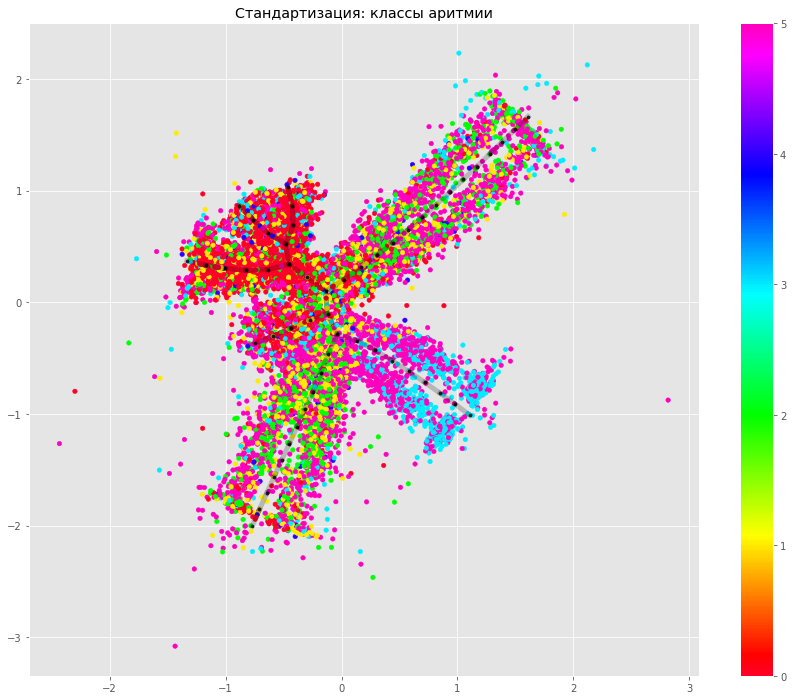

In [45]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_classes_orig_imputer, components_std, mnval_std, 'k', variable_names_classes,
                           Color_by_feature='Class', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: классы аритмии")
plt.show()

In [46]:
dataframe_opt['Class'] = classes
dataframe_opt

ecg_id  SEX   AGE      HEIGHT     WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0  163.154348  63.000000   88.854167    10.836725   
1           2    0  19.0  168.604893  70.000000   87.304365    12.881166   
2           3    1  37.0  164.015717  69.000000   82.310648    13.188344   
3           4    0  24.0  169.867007  82.000000   88.672703    12.592751   
4           5    1  19.0  167.218352  70.000000   92.718519    10.080940   
...       ...  ...   ...         ...        ...         ...          ...   
21425   21833    1  67.0  164.638436  66.811741   83.363930    14.132517   
21426   21834    0  93.0  168.143668  72.809087  100.100000     7.918754   
21427   21835    1  59.0  161.248001  63.683465   89.650000    10.266897   
21428   21836    1  64.0  168.157165  70.801443   98.320106    10.089180   
21429   21837    0  68.0  168.293774  72.236529   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ...  MI  STTC  CD  HYP  \
0         83.796296       2.678984  163.201852  ...   0     0   0    0   
1         84.380952       2.950844  209.904762  ...   0     0   0    0   
2         81.148148       4.022570  183.480808  ...   0     0   0    0   
3         97.016667       2.889637  179.616667  ...   0     0   0    0   
4         86.388889       2.561185  183.248148  ...   0     0   0    0   
...             ...            ...         ...  ...  ..   ...  ..  ...   
21425     92.419048      11.880983  108.567796  ...   0     1   0    0   
21426     88.633333       2.576820  196.740741  ...   0     0   0    0   
21427     90.791667       3.243583  157.833333  ...   0     1   0    0   
21428     86.100000       3.770942  177.083333  ...   0     0   0    0   
21429     81.333333       2.371708  199.509259  ...   0     0   0    0   

       NORM_PROB  MI_PROB  STTC_PROB  CD_PROB  HYP_PROB  Class  
0            100        0          0        0         0      0  
1             80        0          0        0         0      0  
2            100        0          0        0         0      0  
3            100        0          0        0         0      0  
4            100        0          0        0         0      0  
...          ...      ...        ...      ...       ...    ...  
21425          0        0        100        0         0      2  
21426        100        0          0        0         0      0  
21427          0        0         50        0         0      2  
21428        100        0          0        0         0      0  
21429        100        0          0        0         0      0  

[21430 rows x 198 columns]

In [47]:
X_classes_orig_opt = dataframe_opt.drop('ecg_id', axis=1)
X_classes_orig_opt = SimpleImputer(strategy="median").fit_transform(X_classes_orig_opt)

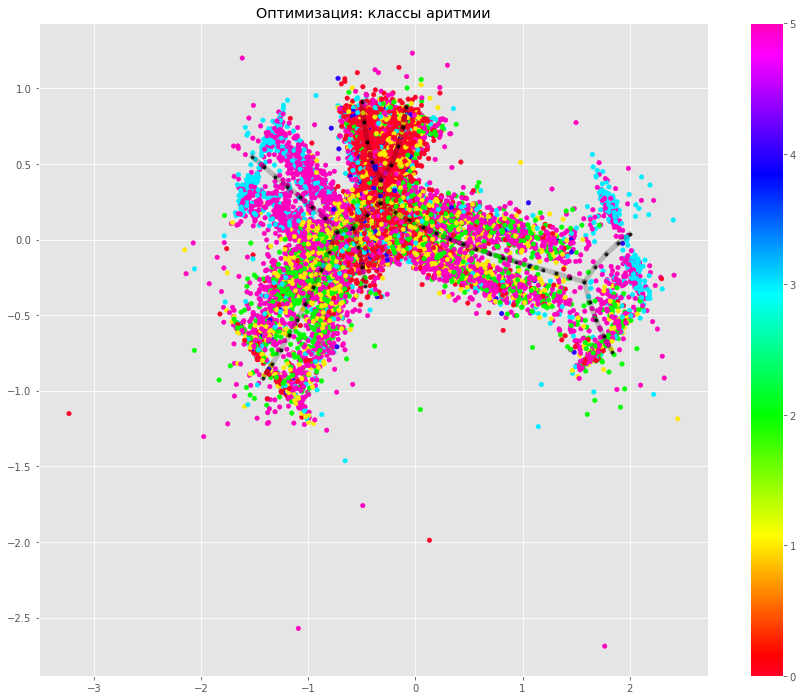

In [50]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_classes_orig_opt, components_opt, mnval_opt, 'k', variable_names_classes,
                           Color_by_feature='Class', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: классы аритмии")
plt.show()